# Curso: Data Analytics: Machine Learning no Marketing Digital

## Objetivos:
* Aprenda a aplicar Machine Learning no Marketing Digital
* Entenda os conceitos de dados de comportamento online
* Transforme dados em formato JSON
* Aprenda a criar variáveis de usuários em sites
* Aplique Gradient Boosting para prever quanto um usuário irá gastar

link: https://cursos.alura.com.br/course/machine-learning-marketing-digital

## Importando as bibliotecas

In [79]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

## Carregando os dados e explorando os dados

In [2]:
df = pd.read_csv('datasets/train.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [3]:
print(f'A base de dados é formado por {df.shape[0]} observações e {df.shape[1]} atributos')

A base de dados é formado por 12283 observações e 12 atributos


In [4]:
df.fullVisitorId.nunique()

9996

In [5]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [6]:
# Carregando os dados agora com o tipo de dado adequado para cada coluna
df = pd.read_csv('datasets/train.csv', dtype={'date': object, 'fullVisitorId': object, 'visitId': object})
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [7]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [8]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
for column in columns:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[column]]))

df.drop(columns + ['adwordsClickInfo'], axis=1, inplace=True)

In [9]:
column_na = []
for column in df.columns:
    if df[column].nunique(dropna=False) == 1:
        column_na.append(column)
        
df.drop(column_na, axis=1, inplace=True)

In [10]:
column_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [11]:
df.shape

(12283, 31)

## Filtrando os dados com que iremos trabalhar

In [12]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'browser', 'operatingSystem',
       'isMobile', 'deviceCategory', 'continent', 'subContinent', 'country',
       'region', 'metro', 'city', 'networkDomain', 'hits', 'pageviews',
       'bounces', 'newVisits', 'transactionRevenue', 'campaign', 'source',
       'medium', 'keyword', 'isTrueDirect', 'referralPath', 'adContent',
       'campaignCode'],
      dtype='object')

In [13]:
quant = ['hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']
for column in quant:
    df[column] = pd.to_numeric(df[column])
df_quant = df.groupby('fullVisitorId', as_index=False)[quant].sum()
df_quant['transactionRevenue'] = df_quant['transactionRevenue'] / 10**6

In [14]:
df_quant.head()

,fullVisitorId,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,1,1.0,1.0,0.0
1,0010286039787739137,4,3,0.0,1.0,0.0
2,0011056874471185769,2,2,0.0,1.0,0.0
3,0014443856125569702,1,1,1.0,1.0,0.0
4,0017260116665815114,2,2,0.0,0.0,0.0


## Criando o 1º modelo com o dataframe filtrado

In [15]:
y = df_quant.transactionRevenue.copy()
X = df_quant.drop('transactionRevenue', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [17]:
df_pred = pd.DataFrame()
df_pred['y_real'] = y_test
df_pred['y_pred'] = y_pred
df_pred['erro'] = df_pred['y_real'] - df_pred['y_pred']
df_pred.head()

,y_real,y_pred,erro
4122,0.0,1.551660,-1.551660
4065,0.0,1.555209,-1.555209
1731,0.0,1.687726,-1.687726
4740,0.0,1.515492,-1.515492
6391,0.0,1.422655,-1.422655


### RMSE

In [18]:
mse = (df_pred['y_real'] - df_pred['y_pred']) ** 2
rmse = np.sqrt(np.mean(mse))
rmse

28.412073660366502

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

28.412073660366516

In [20]:
np.mean(df_quant.transactionRevenue)

1.778953686105831

In [21]:
np.std(df_quant.transactionRevenue)

25.129905708017944

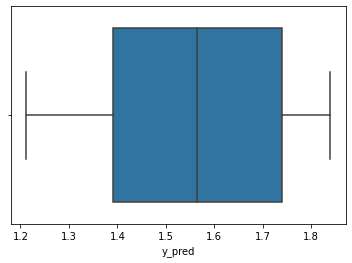

In [22]:
sns.boxplot(x ='y_pred', data=df_pred)
plt.show()

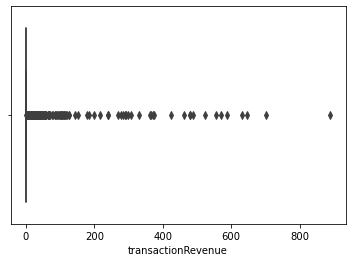

In [23]:
sns.boxplot(x ='transactionRevenue', data=df_quant)
plt.show()

E:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


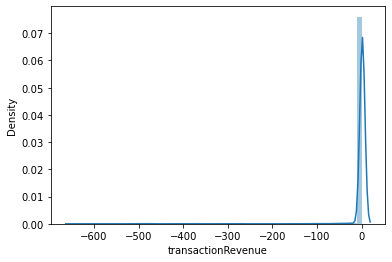

In [24]:
sns.distplot(y_pred - y_test)
plt.show()

In [25]:
df.shape

(12283, 31)

## Explorando outro modelo

In [26]:
# Removendo duplicados baseados no subset para garantir que não há nenhum campo igual
print(df.shape)
visitas_unicas = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])
print(visitas_unicas.shape)

(12283, 31)
(12270, 31)


In [27]:
visitas_unicas.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
dtype: object

In [28]:
visitas_unicas.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'browser', 'operatingSystem',
       'isMobile', 'deviceCategory', 'continent', 'subContinent', 'country',
       'region', 'metro', 'city', 'networkDomain', 'hits', 'pageviews',
       'bounces', 'newVisits', 'transactionRevenue', 'campaign', 'source',
       'medium', 'keyword', 'isTrueDirect', 'referralPath', 'adContent',
       'campaignCode'],
      dtype='object')

In [29]:
print(visitas_unicas.shape)
quant = ['hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']
visitas_unicas.drop(quant, axis=1, inplace=True, errors='ignore')
print(visitas_unicas.shape)

(12270, 31)
(12270, 26)


E:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
ultimas_visitas = df.groupby('fullVisitorId', as_index=False)['visitNumber'].max()
primeiras_visitas = df.groupby('fullVisitorId', as_index=False)['visitNumber'].min()

In [31]:
visitas = pd.merge(ultimas_visitas, visitas_unicas, how='left', on=['fullVisitorId', 'visitNumber'])
primeiras_visitas_df = pd.merge(primeiras_visitas, visitas_unicas, how='left', on=['fullVisitorId', 'visitNumber'])
visitas = pd.merge(visitas, primeiras_visitas_df, how='right', on='fullVisitorId', suffixes=['_ultima', '_primeira'])
visitas = pd.merge(visitas, df_quant, how='left', on='fullVisitorId')
print(visitas.shape)

(9997, 56)


In [32]:
ids = ['sessionId_ultima','visitId_ultima','sessionId_primeira', 'visitId_primeira']
geo = ['continent_primeira', 'subContinent_primeira', 'country_primeira', 'region_primeira', 
       'metro_primeira', 'city_primeira', 'networkDomain_primeira']
visitas.drop(ids,axis=1,inplace=True)
visitas.drop(geo,axis=1,inplace=True)

In [33]:
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitStartTime_primeira',
       'browser_primeira', 'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'keyword_primeira', 'isTrueDirect_primeira',
       'referralPath_primeira', 'adContent_primeira', 'campaignCode_primeira',
       'hits', 'pageviews', 'bounces', 'newVisits', 'tr

In [34]:
numero_de_visitas = df.groupby('fullVisitorId', as_index=False).count()[['fullVisitorId', 'sessionId']]
numero_de_visitas = numero_de_visitas.rename({'sessionId': 'visits'}, axis=1)
visitas = pd.merge(visitas, numero_de_visitas, how='left', on='fullVisitorId')

visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

In [35]:
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])
visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [36]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
operatingSystem_ultima       object
isMobile_ultima                bool
deviceCategory_ultima        object
continent_ultima             object
subContinent_ultima          object
country_ultima               object
region_ultima                object
metro_ultima                 object
city_ultima                  object
networkDomain_ultima         object
campaign_ultima              object
source_ultima                object
medium_ultima                object
keyword_ultima               object
isTrueDirect_ultima          object
referralPath_ultima          object
adContent_ultima             object
campaignCode_ultima          object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitStartTime_primeira     

In [37]:
visitas.shape

(9997, 53)

In [38]:
visitas.drop(['fullVisitorId'], axis=1, inplace=True)

In [45]:
y = visitas['transactionRevenue'].copy()
X = visitas.drop('transactionRevenue', axis=1)

In [55]:
colunas_categoricas = X.select_dtypes(object).columns.values

for coluna in colunas_categoricas:
    encoder = LabelEncoder()
    string = list(X[coluna].astype('str'))
    X[coluna] = encoder.fit_transform(string)

In [73]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,bounces,newVisits,visits,tempo_dif,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,...,1.0,1.0,1,0,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,...,0.0,1.0,1,0,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,...,0.0,1.0,1,0,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,...,1.0,1.0,1,0,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,...,0.0,0.0,1,0,2017,4,20,2017,4,20


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred[y_pred < 0] = 0

In [75]:
df_pred = pd.DataFrame()
df_pred['y_real'] = y_test
df_pred['y_pred'] = y_pred
df_pred['erro'] = df_pred['y_real'] - df_pred['y_pred']
df_pred.head()

,y_real,y_pred,erro
4122,0.0,0.000000,0.000000
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.658041,-0.658041
6391,0.0,0.000000,0.000000


In [76]:
np.sqrt(mean_squared_error(y_test, y_pred))

31.53688113094585

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

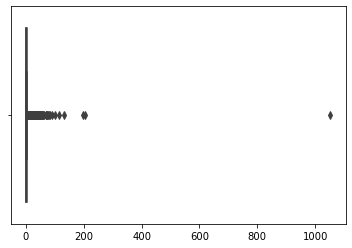

In [77]:
sns.boxplot(y_pred)

## Modelo gradientBoost

In [80]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred[y_pred < 0] = 0

In [81]:
df_pred = pd.DataFrame()
df_pred['y_real'] = y_test
df_pred['y_pred'] = y_pred
df_pred['erro'] = df_pred['y_real'] - df_pred['y_pred']
df_pred.head()

,y_real,y_pred,erro
4122,0.0,0.032582,-0.032582
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.000000,0.000000
6391,0.0,0.000000,0.000000


In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.865916822777184

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

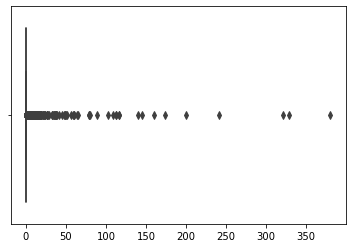

In [83]:
sns.boxplot(y_pred)

## Tentando um novo modelo 

In [84]:
y = visitas['transactionRevenue'].copy()
X = visitas.drop('transactionRevenue', axis=1)

In [85]:
colunas_categoricas = X.select_dtypes(object).columns.values

for coluna in colunas_categoricas:
    encoder = LabelEncoder()
    string = list(X[coluna].astype('str'))
    X[coluna] = encoder.fit_transform(string)

In [89]:
visitas.dtypes

visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
operatingSystem_ultima       object
isMobile_ultima                bool
deviceCategory_ultima        object
continent_ultima             object
subContinent_ultima          object
country_ultima               object
region_ultima                object
metro_ultima                 object
city_ultima                  object
networkDomain_ultima         object
campaign_ultima              object
source_ultima                object
medium_ultima                object
keyword_ultima               object
isTrueDirect_ultima          object
referralPath_ultima          object
adContent_ultima             object
campaignCode_ultima          object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitStartTime_primeira       int64
browser_primeira            

In [90]:
X.drop(['visitStartTime_ultima', 'visitStartTime_primeira'], axis=1, inplace=True)

In [95]:
visitas.corr()['transactionRevenue']

visitNumber_ultima         0.150061
visitStartTime_ultima     -0.000570
isMobile_ultima           -0.037897
visitNumber_primeira       0.087550
visitStartTime_primeira   -0.009829
isMobile_primeira         -0.037885
hits                       0.429253
pageviews                  0.428625
bounces                   -0.015126
newVisits                 -0.085076
transactionRevenue         1.000000
visits                     0.180726
tempo_dif                  0.070569
ano_ultima                 0.013293
mes_ultima                -0.023177
dia_ultima                -0.002409
ano_primeira              -0.004265
mes_primeira              -0.000986
dia_primeira              -0.014846
Name: transactionRevenue, dtype: float64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred[y_pred < 0] = 0

df_pred = pd.DataFrame()
df_pred['y_real'] = y_test
df_pred['y_pred'] = y_pred
df_pred['erro'] = df_pred['y_real'] - df_pred['y_pred']
df_pred.head()

,y_real,y_pred,erro
4122,0.0,0.027726,-0.027726
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.000000,0.000000
6391,0.0,0.158724,-0.158724


In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.888092239436375

In [99]:
y_pred.shape

(3000,)